# Random Forests




1. Train a Random Forest model on the training data.
2. Calculate the training error and test error.
3. Plot the training and test errors to visualize the bias-variance tradeoff.

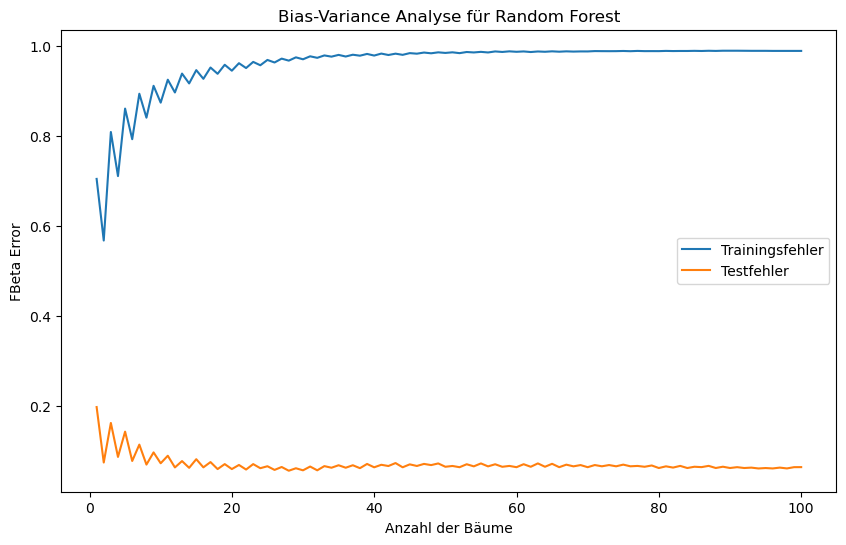

In [6]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, fbeta_score
from sklearn.model_selection import train_test_split
import pandas as pd

# Lade den Datensatz
train_data_loaded = pd.read_csv('../data/train_data_2024-08-01.csv')
X = train_data_loaded.drop(columns=['UKATEGORIE'])
y = train_data_loaded['UKATEGORIE']

# Splitte den Datensatz in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialisiere Listen für Trainings- und Testfehler
train_errors = []
test_errors = []

# Anzahl der Bäume im Wald variieren
n_estimators_range = range(1, 101)

for n_estimators in n_estimators_range:
    # Trainiere das Random Forest Modell
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    model.fit(X_train, y_train)
    
    # Vorhersagen auf Trainings- und Testdaten
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Berechne den MSE für Trainings- und Testdaten
    train_fbeta = fbeta_score(y_train, y_train_pred, beta=2)
    test_fbeta = fbeta_score(y_test, y_test_pred, beta=2)
    
    # Füge die Fehler zu den Listen hinzu
    train_errors.append(train_fbeta)
    test_errors.append(test_fbeta)

# Plot der Trainings- und Testfehler
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_errors, label='Trainingsfehler')
plt.plot(n_estimators_range, test_errors, label='Testfehler')
plt.xlabel('Anzahl der Bäume')
plt.ylabel('FBeta Score')
plt.title('Bias-Variance Analyse für Random Forest')
plt.legend()
plt.show()

